In [1]:
import numpy as np
import sklearn.datasets
import matplotlib.pyplot as plt

In [2]:
dataset = sklearn.datasets.load_iris()

In [64]:
X = np.log(0.1 + dataset['data']) 
T = dataset['target']  
target_names = dataset['target_names'] 
feature_names = dataset['feature_names']

In [65]:
X = X - X.mean(axis=0)
N, d = X.shape 

In [66]:
stot = (X**2).mean(axis=0).sum()
print('Total variance: %.3f' % stot)

Total variance: 1.027


In [67]:
def PCA(X):
    covariance_matrix = np.cov(X, rowvar=False)
    
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
    
    sorted_indices = np.argsort(eigenvalues)[::-1]
    L = eigenvalues[sorted_indices]
    U = eigenvectors[:, sorted_indices]
    
    return L, U

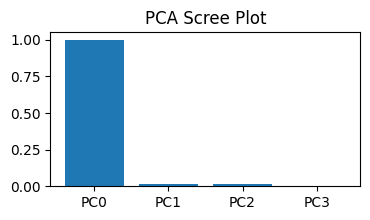

In [68]:
L, U = PCA(X)

plt.figure(figsize=(4, 2))
plt.title('PCA Scree Plot')
plt.bar(np.arange(len(L)), L)
plt.xticks(range(len(L)), labels=['PC%d' % i for i in range(len(L))])
plt.show()


In [71]:
print('Total variance: %.3f' % stot)
print('Sum of eigenvalues: %.3f' % L.sum()) 

Total variance: 1.027
Sum of eigenvalues: 1.033


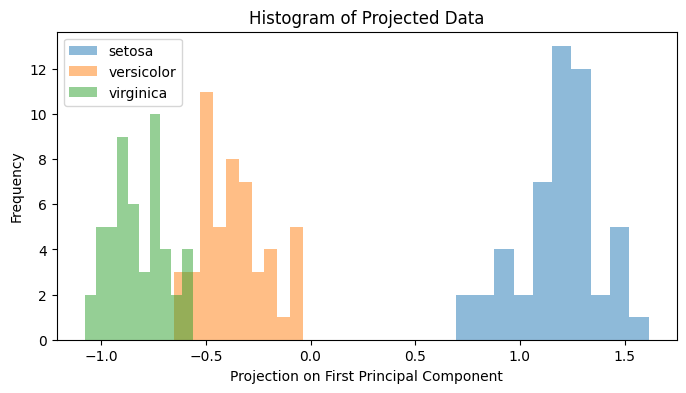

In [54]:
Z = X.dot(U[:, 0])

def PCAplot(Z, T, target_names):
    plt.figure(figsize=(8, 4))
    for i, target_name in enumerate(target_names):
        plt.hist(Z[T == i], bins=10, alpha=0.5, label=target_name)
    plt.xlabel('Projection on First Principal Component') 
    plt.ylabel('Frequency')
    plt.title('Histogram of Projected Data')
    plt.legend()
    plt.show()

PCAplot(Z, T, target_names)

        

In [35]:
def printformula(U, feature_names):
    print("z = ")
    for i in range(len(feature_names)):
        sign = '+' if U[i] >= 0 else ''
        print(f" {sign}{U[i]:.3f} * log(0.1 + {feature_names[i]})")
       

In [34]:
printformula(U[:, 0], feature_names)


z = 
 -0.115 * log(0.1 + sepal length (cm))
 +0.064 * log(0.1 + sepal width (cm))
 -0.561 * log(0.1 + petal length (cm))
 -0.817 * log(0.1 + petal width (cm))
